In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# 데이터 탐색

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
# 데이터 전처리

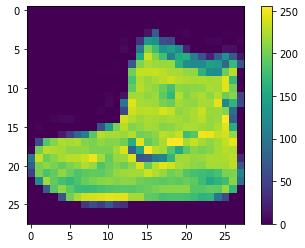

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
x_train = train_images / 255.0
x_test = test_images / 255.0

In [13]:
# 실제 값
train_labels[0]

9

In [14]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

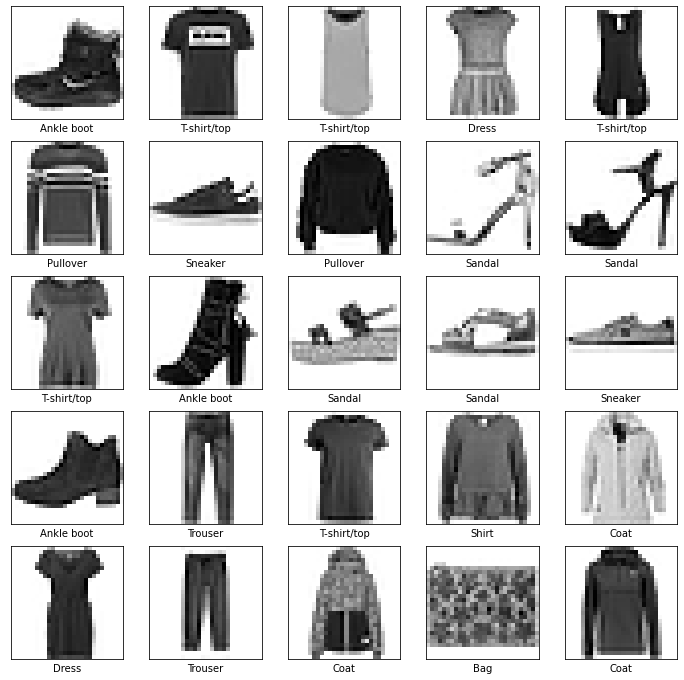

In [15]:
# 훈련 세트에서 처음 25개 이미지와 클래스 이름을 출력
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
# 모델 구성
## 층 설정

In [17]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10, activation='softmax')])

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', 
             metrics=['accuracy']) # 원핫인코딩이 되어 있으면 sparse_categori... 안 함

In [19]:
# 모델 훈련

In [20]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.5025 - accuracy: 0.8229
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3723 - accuracy: 0.8653
Epoch 3/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3371 - accuracy: 0.8776
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3113 - accuracy: 0.8869
Epoch 5/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2933 - accuracy: 0.8926


In [21]:
# 정확도 평가

In [22]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 0s - loss: 0.3385 - accuracy: 0.8812

테스트 정확도: 0.8812


In [23]:
# 예측 만들기

In [24]:
predictions = model.predict(x_test)

In [25]:
np.argmax(predictions[0])

9

In [26]:
# 실제 값
test_labels[0]

9

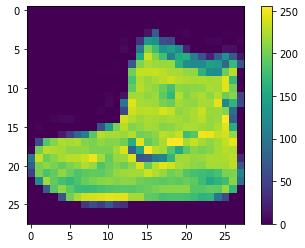

In [27]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

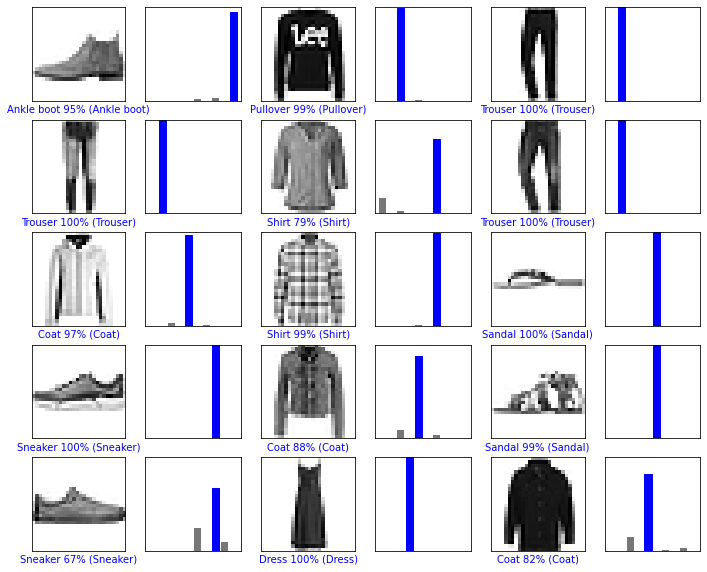

In [29]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [45]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [46]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [47]:
x_train.shape

(60000, 28, 28, 1)

In [48]:
y_train.shape

(60000, 10)

In [49]:
import numpy  as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [57]:
model1 = Sequential([Conv2D(32, kernel_size=(1,1), input_shape=(28,28,1), activation='relu'),
                   Conv2D(64, (3, 3), activation='relu'), MaxPooling2D(pool_size=2),
                   Dropout(0.25), Flatten(), Dense(128, activation='relu'),
                   Dropout(0.5), Dense(10, activation='softmax')])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        64        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [58]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

# 모델 최적화 설정
MODEL_DIR = './model1/'
if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)

In [53]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [54]:
# 모델의 실행
history = model1.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=30, batch_size=200,
                   callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 49s 816us/step - loss: 0.5417 - accuracy: 0.8109 - val_loss: 0.3468 - val_accuracy: 0.8751

Epoch 00001: val_loss improved from inf to 0.34682, saving model to ./model1/mnist-cnn-01-0.3468.hdf5
Epoch 2/30
60000/60000 [==============================] - 50s 825us/step - loss: 0.3591 - accuracy: 0.8718 - val_loss: 0.3108 - val_accuracy: 0.8850

Epoch 00002: val_loss improved from 0.34682 to 0.31083, saving model to ./model1/mnist-cnn-02-0.3108.hdf5
Epoch 3/30
60000/60000 [==============================] - 50s 837us/step - loss: 0.3169 - accuracy: 0.8847 - val_loss: 0.2902 - val_accuracy: 0.8928

Epoch 00003: val_loss improved from 0.31083 to 0.29022, saving model to ./model1/mnist-cnn-03-0.2902.hdf5
Epoch 4/30
60000/60000 [==============================] - 49s 820us/step - loss: 0.2901 - accuracy: 0.8946 - val_loss: 0.2751 - val_accuracy: 0.8987

Epoch 00004: val_loss improved from 

In [59]:
from keras.models import load_model
del model1
model = load_model('model1/mnist-cnn-14-0.2472.hdf5')

In [60]:
# 테스트 정확도 출력
print("\n Test Accuracy : %.4f" % (model.evaluate(x_test, y_test, verbose=0)[1]))


 Test Accuracy : 0.9166


In [61]:
predictions = model.predict(x_test)

In [62]:
predictions[0]

array([1.66141389e-11, 1.38914791e-12, 1.12605090e-11, 3.17485968e-11,
       1.78919298e-13, 1.53087376e-06, 6.67139566e-10, 1.05838764e-04,
       7.00603298e-10, 9.99892592e-01], dtype=float32)